# __Brough Lecture Notes: GARCH Models in R__

<br>

Finance 5330: Financial Econometrics <br>
Tyler J. Brough <br>
Last Updated: April 1, 2019 <br>
<br>
<br>

In [1]:
options(warn=-1)

In [2]:
require(bayesGARCH)
require(rugarch)
require(zoo)

Loading required package: bayesGARCH
Loading required package: rugarch
Loading required package: parallel

Attaching package: 'rugarch'

The following object is masked from 'package:stats':

    sigma

Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



In [3]:
ibm <- read.csv("S&P_data.csv", header=T)
ibm$RET <- (ibm$spindx[2:3355] - ibm$spindx) / ibm$spindx

In [4]:
head(ibm)

DATE,spindx,RET
19941201,448.92,9.756750e-03
19941202,453.30,6.618134e-05
19941205,453.33,-4.852977e-04
19941206,453.11,-4.149103e-03
19941207,451.23,-1.280943e-02
19941208,445.45,3.412280e-03


In [5]:
tail(ibm)

,DATE,spindx,RET
3350,20080324,1349.88,0.002303908
3351,20080325,1352.99,-0.008765771
3352,20080326,1341.13,-0.011460485
3353,20080327,1325.76,-0.007950157
3354,20080328,1315.22,0.005687261
3355,20080331,1322.70,-0.657291903


In [6]:
index <- as.Date(as.character(ibm$DATE), "%Y%m%d")
ret <- zoo(ibm$RET, as.Date(as.character(ibm$DATE), "%Y%m%d"))

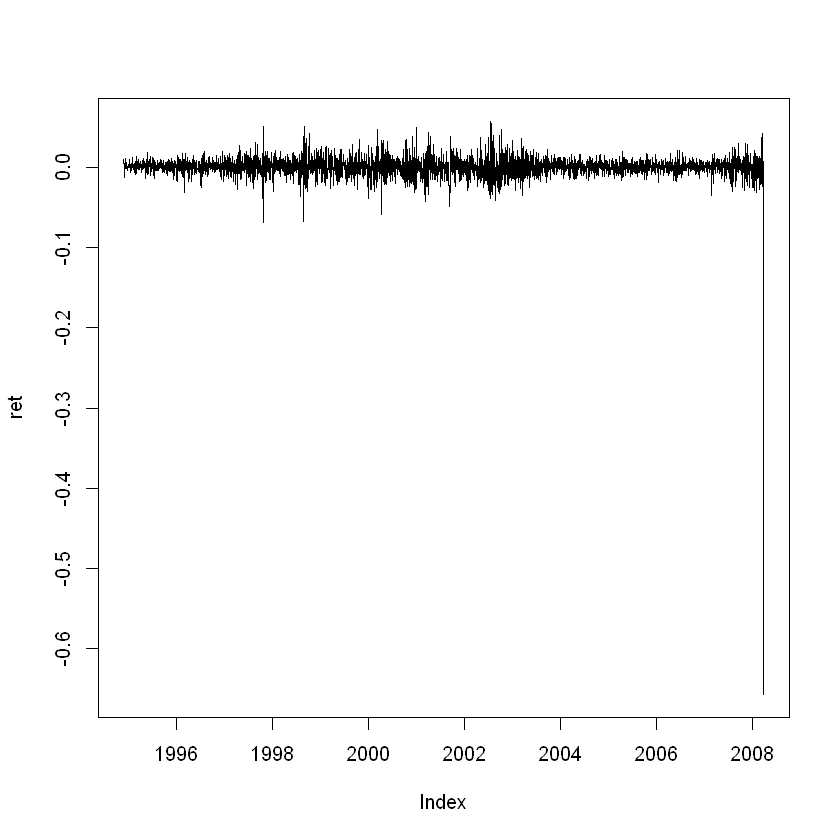

In [7]:
plot(ret)

In [8]:
spec <- ugarchspec(mean.model = list(armaOrder = c(0,0), include.mean=FALSE))

In [19]:
#help(ugarchfit)

In [20]:
data <- zoo
fit <- ugarchfit(data = ret, spec = spec, solver="hybrid")

In [11]:
fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error   t value Pr(>|t|)
omega   0.000001    0.000000    3.0474 0.002309
alpha1  0.076545    0.002297   33.3297 0.000000
beta1   0.917168    0.000402 2280.8491 0.000000

Robust Standard Errors:
        Estimate  Std. Error    t value Pr(>|t|)
omega   0.000001    0.000001    0.73253  0.46385
alpha1  0.076545    0.002663   28.74074  0.00000
beta1   0.917168    0.000646 1419.05445  0.00000

LogLikelihood : 10791.13 

Information Criteria
------------------------------------
                    
Akaike       -6.4311
Bayes        -6.4256
Shibata      -6.4311
Hannan-Quinn -6.4291

Weighted Ljung-Box Test on Standardized Residuals
------------------------------------

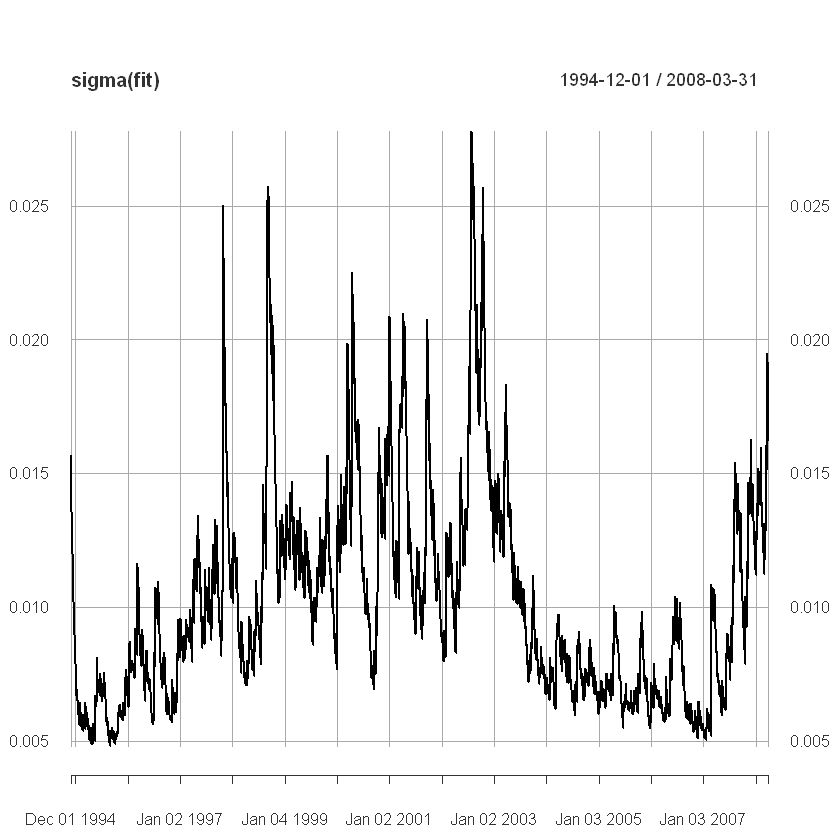

In [12]:
plot(sigma(fit))

In [18]:
vals <- coef(fit)
what <- coef(fit)[1]
ahat <- coef(fit)[2]
bhat <- coef(fit)[3]

In [14]:
what

omega 
1.009531e-06

In [36]:
ahat

alpha1 
0.07654513

In [37]:
bhat

beta1 
0.9171675

In [38]:
ret[76]

1995-03-21 
0.00121195 

In [38]:
ind <- (abs(ret) >= 0.12)
ret[ind]

1999-04-22 1999-10-21 2000-07-20 2000-10-18 2001-01-18 
  0.131636  -0.149533   0.130435  -0.155420   0.120233 

In [39]:
 ii <- 1:length(ret)

In [40]:
c(ii[ind])

[1]  76 203 391 454 516

In [41]:
spec2 <- ugarchspec(variance.model=list(model = "gjrGARCH", garchOrder=c(1,1,1)), mean.model=list(armaOrder=c(0,0), include.mean=F))

In [42]:
fit2 <- ugarchfit(data=ret, spec=spec2, solver="hybrid")

In [43]:
fit2


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: gjrGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
omega   0.000003    0.000003  0.79813 0.424797
alpha1  0.003790    0.005563  0.68120 0.495745
beta1   0.952995    0.010954 86.99594 0.000000
gamma1  0.084431    0.016816  5.02100 0.000001

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
omega   0.000003    0.000014  0.18585  0.85256
alpha1  0.003790    0.012459  0.30416  0.76101
beta1   0.952995    0.039386 24.19621  0.00000
gamma1  0.084431    0.051710  1.63277  0.10252

LogLikelihood : 2944.735 

Information Criteria
------------------------------------
                    
Akaike       -4.6827
Bayes        -4.6663
Shibata      -4.6827
Hannan-Quinn -4.6766

We